In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
sns.set()

In [3]:
poi_x, poi_y = (2,5)
close_dist = 1.5
far_dist = 6
data_dir = 'data/exp1'

In [4]:
csv_files = [f for f in os.listdir(data_dir) if f.endswith(".csv")]

In [6]:
dfs = [
    pd.read_csv(os.path.join(data_dir, csv), parse_dates=['time']).assign(dataset_index=i + 1)
    for i, csv in enumerate(csv_files)
]

In [62]:
dfc = dfs[0] # pd.concat(dfs, keys=range(len(dfs)))

In [63]:
step_times = [
    dfc[dfc['xp_step'] == s]['time'].iloc[0]
    for s
    in range(0, max(dfc['xp_step']+1))
]
step_times.append(max(dfc['time']))

In [64]:
dfc = dfc[(dfc['x'] != 0) & (dfc['y'] != 0) & (dfc['xp_step'] >= 0)].reset_index(drop=True)

In [65]:
theorical_positions = []

for i, row in dfc.iterrows():
    if row['xp_step'] in [0, 4]:
        theorical_positions.append([8, 5])
    elif row['xp_step'] in [2]:
        theorical_positions.append([3, 5])
    elif row['xp_step'] in [1]:
        theorical_positions.append([8 - (row['time']-step_times[1]) / (step_times[2]-step_times[1]) * 5, 5])
    elif row['xp_step'] in [3]:
        theorical_positions.append([ (row['time']-step_times[3]) / (step_times[4]-step_times[3]) * 5 + 3, 5])
    else:
        print(row)
    
dfc['theorical_x'], dfc['theorical_y'] = np.array(theorical_positions).T

In [67]:
dfc['poi_dist_calc'] = ((dfc['x']-poi_x)**2 + (dfc['y']-poi_y)**2)**0.5
dfc['poi_dist_theorical'] = ((dfc['theorical_x']-poi_x)**2 + (dfc['theorical_y']-poi_y)**2)**0.5

In [68]:
dfc['error_dist'] = ((dfc['x']-dfc['theorical_x'])**2 + (dfc['y']-dfc['theorical_y'])**2)**0.5

In [71]:
dfc['error_poi_dist'] = (dfc['poi_dist_theorical']-dfc['poi_dist_calc']).abs()

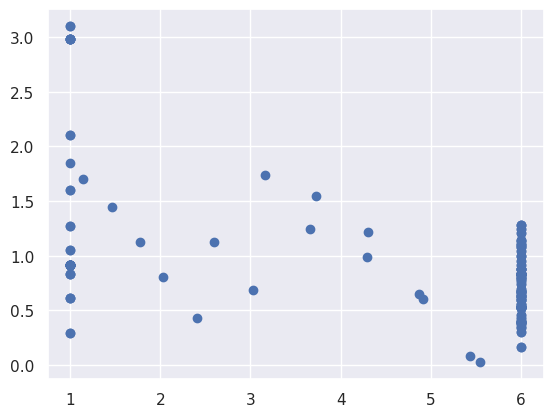

In [76]:
plt.scatter(dfc['poi_dist_theorical'], dfc['error_poi_dist'])